Các bước Làm
+ 1, Load Data
+ 2, Processing Data
+ 3, Calculate Recency, Frequency, Monetary
+ 4, Merge 3 values into RFM Table
+ 5, Clustering by Kmeans

In [ ]:
#cần thêm drive để có thể tìm thấy data trong gg drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import các thư viện cần thiết
import pandas as pd #dùng để load data và tạo Dataframe
import time, warnings 
import datetime #dùng để tạo kiểu dữ liệu datetime
import datetime as dt
import numpy as np #cần numpy để tính toán ma trận
import seaborn as sns
import matplotlib.pyplot as plt #dùng để plot biểu đồ 
from pandas.plotting import scatter_matrix 
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
dir_path = '/content/drive/MyDrive/Bank_Data.csv' #đưa đường dẫn tới data tại đây
# path = os.path.join(dir_path,'data.csv')

# Load Data

In [ ]:
retail_df = pd.read_csv(dir_path,encoding="UTF-8",dtype={'CustomerID': str,'InvoiceID': str}) #đọc dữ liệu vào dataframe
retail_df.head() #show 5 records đầu tiên
#

,Quantity,InvoiceDate,Credit_amount,CustomerID,Age,location,Gender,StockCode,InvoiceNo
0,6,12/1/2010 8:26,101348.88,17850,42,"HỒ CHÍ MINH,Opening all areas of HCM,,",Female,85123A,536365
1,6,12/1/2010 8:26,112542.58,17850,41,"HÀ NỘI,Opening all areas of HN,,",Female,71053,536365
2,8,12/1/2010 8:26,113931.57,17850,42,"HƯNG YÊN,Opening all areas of Hung Yen,,",Female,84406B,536365
3,6,12/1/2010 8:26,93826.63,17850,39,"ĐÀ NẴNG,Opening all areas of DA NANG,,",Female,84029G,536365
4,6,12/1/2010 8:26,79084.10,17850,43,"BÌNH DƯƠNG,Opening all areas of Binh Duong,,",Female,84029E,536365


In [ ]:
retail_df.shape # kích thước của retail_df hiện tại 

(541909, 9)

# Preprocessing Data

In [ ]:
#loại bỏ records có CustomerID là NA 
retail_df.dropna(subset=['CustomerID'],how='all',inplace=True)

In [ ]:
#loại bỏ canceled orders 
retail_df= retail_df[retail_df['Quantity']>0]
retail_df.shape

(397924, 9)

In [ ]:
retail_df.shape #kích thước retail_df sau khi processing


(397924, 9)

In [ ]:
# đưa ra 1 số thông tin tổng quát

print("Number of transactions: ", retail_df['InvoiceNo'].nunique())
# print("Number of products bought: ",retail_df['StockCode'].nunique())
print("Number of customers:", retail_df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_df['CustomerID'].isnull().sum() * 100 / len(retail_df),2),"%" )

Number of transactions:  18536
Number of customers: 4339
Percentage of customers NA:  0.0 %


In [ ]:
retail_df['Credit_amount'] = pd.to_numeric(retail_df['Credit_amount'])

# RFM Analysis
*RFM analysis (Recency, Frequency, Monetary)*

+ RECENCY (R): Days since last purchase
+ FREQUENCY (F): Total number of purchases
+ MONETARY VALUE (M): Total money this customer spent.

In [ ]:
retail_df['InvoiceDate'].max() #tìm xem ngày muộn nhất trong cột InvoiceDate

'9/9/2011 9:52'

In [ ]:
now = dt.date(2011,12,9) #tạo một ngày trong biến now với giá trị là 2011-12-09
print(now)

2011-12-09


In [ ]:
#tạo một cột mới chỉ lưu ngày tháng năm với tên là date
retail_df['date'] = pd.DatetimeIndex(retail_df['InvoiceDate']).date

In [ ]:
retail_df.head()
#ta thấy cột date ở cuối dataframe

,Quantity,InvoiceDate,Credit_amount,CustomerID,Age,location,Gender,StockCode,InvoiceNo,date
0,6,12/1/2010 8:26,101348.88,17850,42,"HỒ CHÍ MINH,Opening all areas of HCM,,",Female,85123A,536365,2010-12-01
1,6,12/1/2010 8:26,112542.58,17850,41,"HÀ NỘI,Opening all areas of HN,,",Female,71053,536365,2010-12-01
2,8,12/1/2010 8:26,113931.57,17850,42,"HƯNG YÊN,Opening all areas of Hung Yen,,",Female,84406B,536365,2010-12-01
3,6,12/1/2010 8:26,93826.63,17850,39,"ĐÀ NẴNG,Opening all areas of DA NANG,,",Female,84029G,536365,2010-12-01
4,6,12/1/2010 8:26,79084.10,17850,43,"BÌNH DƯƠNG,Opening all areas of Binh Duong,,",Female,84029E,536365,2010-12-01


In [ ]:
recency_df = retail_df.groupby(by='CustomerID', as_index=False)['date'].max()
#groupby ở đây giống với trong SQL nó gom các CustomerId có giá trị giống nhau nhưng chỉ lấy max của date tương ứng với CustomerID đó
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12346,2011-01-18
1,12347,2011-12-07
2,12348,2011-09-25
3,12349,2011-11-21
4,12350,2011-02-02


### Calculate Recency

In [ ]:
# Tính toán Recency thủ công
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [ ]:
#hiện tại thì cột LastPurchaseDate không còn cần thiết nữa nên ta xóa cột đó chỉ để lại cột Recency
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

In [ ]:
recency_df.head()

,CustomerID,Recency
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310


### Calculate Frequency

In [ ]:
# Xóa các duplicates (các bản ghi bị trùng nhau)
retail_df_copy = retail_df
retail_df_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#tính frequency của các Customer
frequency_df = retail_df_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count() #dòng code này giải thích tương tự như CELL65
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


### Calculate Monetary

In [ ]:
# #Tính Monetary thủ công
# retail_df['TotalCost'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18536 entries, 0 to 541894
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Quantity       18536 non-null  int64  
 1   InvoiceDate    18536 non-null  object 
 2   Credit_amount  18536 non-null  float64
 3   CustomerID     18536 non-null  object 
 4   Age            18536 non-null  int64  
 5   location       18536 non-null  object 
 6   Gender         18536 non-null  object 
 7   StockCode      18536 non-null  object 
 8   InvoiceNo      18536 non-null  object 
 9   date           18536 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.6+ MB


In [ ]:
monetary_df = retail_df.groupby(by='CustomerID',as_index=False).agg({'Credit_amount': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346,114190.30
1,12347,896473.28
2,12348,481049.47
3,12349,64831.36
4,12350,101273.23


## Create RFM Table

In [ ]:
temp_df = recency_df.merge(frequency_df,on='CustomerID') #trộn 2 bảng rencency và frequency
temp_df.head()

,CustomerID,Recency,Frequency
0,12346,325,1
1,12347,2,7
2,12348,75,4
3,12349,18,1
4,12350,310,1


In [ ]:
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#trộn 2 bảng (bảng vừa trộn giữa recency+frequency và monetary)
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,114190.30
12347,2,7,896473.28
12348,75,4,481049.47
12349,18,1,64831.36
12350,310,1,101273.23


In [ ]:
#Lấy toàn bộ thông tin của Customer với CustomerID là 12820
retail_df[retail_df['CustomerID']=='12820']

,Quantity,InvoiceDate,Credit_amount,CustomerID,Age,location,Gender,StockCode,InvoiceNo,date
59368,24,1/17/2011 12:34,34673.98,12820,28,"QUÃNG NGÃI,Dist. Bình Sơn,Commune. Bình Nguyên",Male,21977,541283,2011-01-17
360567,4,9/26/2011 11:49,62830.97,12820,36,"THÁI NGUYÊN,Dist. Đại Từ,Commune. An Khánh",Female,23328,568236,2011-09-26
420111,12,10/26/2011 13:27,78397.24,12820,36,"VĨNH PHÚC,Dist. Vĩnh Tường,Commune. Tân Tiến",Female,23436,572873,2011-10-26
531846,12,12/6/2011 15:12,71333.44,12820,68,"TRÀ VINH,Châu Thành,Lương Hòa",Male,21098,580973,2011-12-06


In [ ]:

quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,126826.565
0.50,50.0,2.0,227923.110
0.75,141.5,5.0,482192.100


In [ ]:
#chuyển quantile sáng kiểu dữ liệu là dictionary
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 126826.565, 0.5: 227923.11000000002, 0.75: 482192.1}}

In [ ]:
#Tạo hàm dùng để tính FMSscore và RSscore
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# tham số (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,)) #tính R_Quartile sau đó thêm 1 cột với tên là R_Quartile
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,)) #tính F_Quartile sau đó thêm 1 cột với tên là F_Quartile
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,)) #tính M_Quartile sau đó thêm 1 cột với tên là M_Quartile

In [ ]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346,325,1,114190.30,1,1,1
12347,2,7,896473.28,4,4,4
12348,75,4,481049.47,2,3,3
12349,18,1,64831.36,3,1,1
12350,310,1,101273.23,1,1,1


In [ ]:
#Tính chỉ số RFM
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346,325,1,114190.30,1,1,1,111
12347,2,7,896473.28,4,4,4,444
12348,75,4,481049.47,2,3,3,233
12349,18,1,64831.36,3,1,1,311
12350,310,1,101273.23,1,1,1,111


In [ ]:
#Đưa ra 1 số nhận định (Tham Khảo)
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  499
Loyal Customers:  872
Big Spenders:  1085
Almost Lost:  86
Lost Customers:  17
Lost Cheap Customers:  449


# Clustering 

## Transform Data

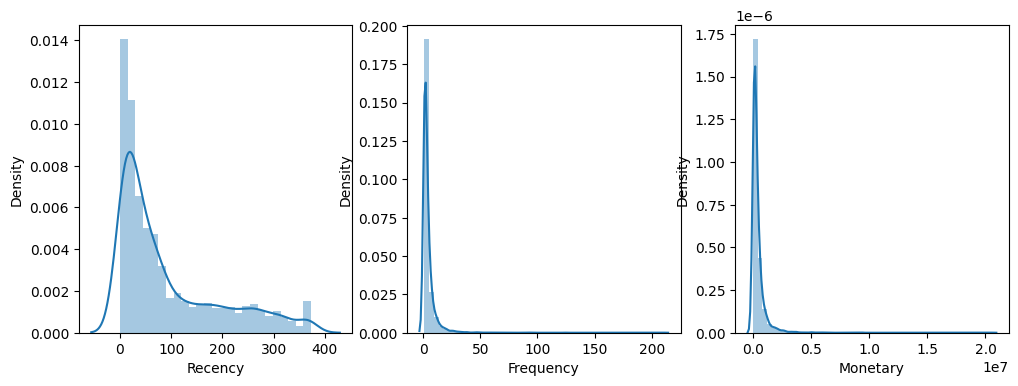

In [ ]:
#Visualize bộ dữ liệu theo từng khía cạnh
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(rfm_segmentation['Recency'], ax = ax[0])
sns.distplot(rfm_segmentation['Frequency'], ax = ax[1])
sns.distplot(rfm_segmentation['Monetary'], ax = ax[2])
plt.show()

In [ ]:
#chỉ số skewness dùng để đánh giá xem bộ dữ liệu đối xứng hay lệch phải, lệch trái 
#Nếu đồ thị lệch phải hay lệch trái thì nó sẽ làm giảm hiệu suất đánh giá của mô hình
#Đồ thị chuẩn (lý tưởng) là khi mà chỉ số skewness bằng 0 lúc này đồ thị là đồ thị đối xứng
#hàm này sẽ kiểm tra chỉ số skewness
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm_segmentation[x], ax=ax[0,0])
    sns.distplot(np.log(rfm_segmentation[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm_segmentation[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm_segmentation[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(rfm_segmentation[x].skew().round(2))
    print(np.log(rfm_segmentation[x]).skew().round(2))
    print(np.sqrt(rfm_segmentation[x]).skew().round(2))
    print(pd.Series(stats.boxcox(rfm_segmentation[x])[0]).skew().round(2))

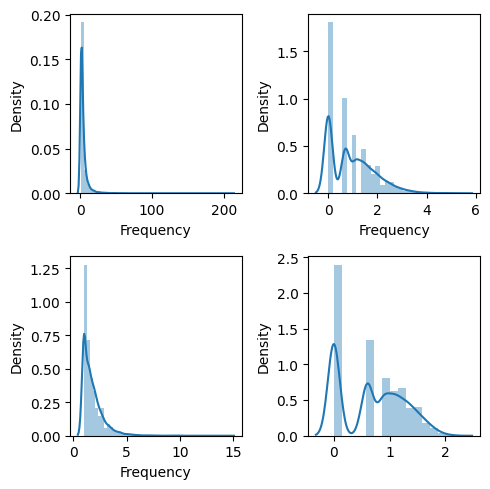

12.1
0.78
3.03
0.14


In [ ]:
analyze_skewness('Frequency')

In [ ]:
#Ta thấy là chỉ số skewness khi dùng box-cox là gần bằng 0 nhất (tốt nhất) nên ta dùng box-cox

In [ ]:
retail_df.head()

,Quantity,InvoiceDate,Credit_amount,CustomerID,Age,location,Gender,StockCode,InvoiceNo,date
0,6,12/1/2010 8:26,101348.88,17850,42,"HỒ CHÍ MINH,Opening all areas of HCM,,",Female,85123A,536365,2010-12-01
7,6,12/1/2010 8:28,119346.88,17850,29,"NAM ĐỊNH,Opening all areas of Nam Dinh,,",Female,22633,536366,2010-12-01
9,32,12/1/2010 8:34,71725.73,13047,27,"THÁI BÌNH,Opening all areas of THAI BINH,,",Male,84879,536367,2010-12-01
21,6,12/1/2010 8:34,138555.46,13047,32,"ĐỒNG NAI,City. Biên Hòa,Ward.Thanh Bình",Female,22960,536368,2010-12-01
25,3,12/1/2010 8:35,124508.29,13047,25,"ĐỒNG NAI,City. Biên Hòa,Ward.Long Bình",Male,21756,536369,2010-12-01


In [ ]:
# Chuyen tu string -> date
retail_df['InvoiceDate'] =  pd.to_datetime(retail_df['date'], format='%Y-%m-%d')
# Lay ngay lon nhat trong InvoiceDate + 1
current_date = max(retail_df['InvoiceDate']) + datetime.timedelta(days=1)
# -------- Tinh M - MoneytaryValue

# Group by CustomerID de tinh R, F, M
df_customers = retail_df.groupby(['CustomerID']).agg(
    {'InvoiceDate': lambda x: (current_date- x.max()).days,
     'InvoiceNo':'count',
     'Credit_amount':'sum'
    }
)

In [ ]:
#Dùng boxcox để Transform
df_customers_t = pd.DataFrame()
df_customers_t['Recency'] = stats.boxcox(df_customers['InvoiceDate'])[0]
df_customers_t['Frequency'] = stats.boxcox(df_customers['InvoiceNo'])[0]
df_customers_t['Monetary'] = pd.Series(np.cbrt(df_customers['Credit_amount'])).values
df_customers_t.head(10)

,Recency,Frequency,Monetary
0,9.475990,0.000000,48.515041
1,1.200013,1.338920,96.422662
2,6.223399,1.056408,78.354374
3,3.751669,0.000000,40.172455
4,9.358611,0.000000,46.612052
5,4.872394,1.397247,90.481440
6,8.357320,0.000000,44.121397
7,8.657894,0.000000,27.938282
8,8.468425,0.000000,36.100215
9,4.060934,0.883793,70.840274


## Scale Data

In [ ]:
# Tien hanh scale du lieu
# scale dữ liệu với StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customers_t)

df_customers_t = scaler.transform(df_customers_t)


In [ ]:
pd.DataFrame(df_customers_t).head()

,0,1,2
0,1.620339,-1.184399,-0.677968
1,-1.738882,1.159476,1.221495
2,0.300112,0.664920,0.505116
3,-0.703164,-1.184399,-1.008738
4,1.572694,-1.184399,-0.753418


## Clustering with Kmeans

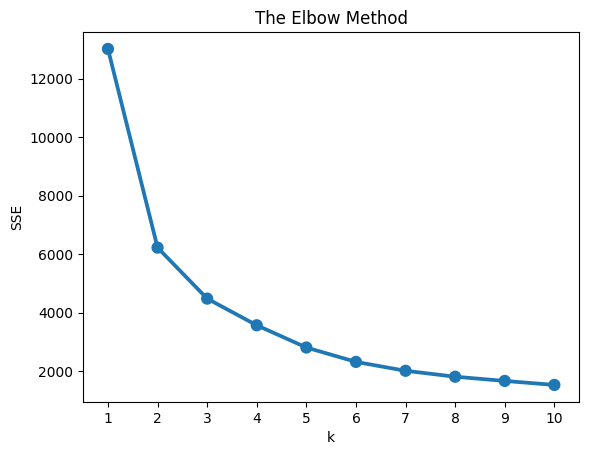

In [ ]:
# Dua du lieu vao KNN

# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

sse = {} #Sum of Square Error
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_t)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
#Training model
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_customers_t)


KMeans(n_clusters=3, random_state=42)

In [ ]:
#Thêm 1 cột Cluster sau khi đã phân cụm
df_customers['Cluster'] = model.labels_
df_customers.head()

,InvoiceDate,InvoiceNo,Credit_amount,Cluster
CustomerID,,,,
12346,326,1,114190.30,2
12347,3,7,896473.28,1
12348,76,4,481049.47,0
12349,19,1,64831.36,2
12350,311,1,101273.23,2


In [ ]:
df_customers.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Credit_amount':'Monetary'}, inplace=True)

In [ ]:
df_customers.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,326,1,114190.30,2
12347,3,7,896473.28,1
12348,76,4,481049.47,0
12349,19,1,64831.36,2
12350,311,1,101273.23,2


In [ ]:
#Hiển thị tổng quát về các giá trị RFM theo từng cụm
df_customers.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(2)


,Recency,Frequency,Monetary
Cluster,,,
0,54.63,3.41,336215.44
1,15.52,13.20,1345455.54
2,167.05,1.18,115535.82
